<a href="https://colab.research.google.com/github/HoangKhaLe/b-i-t-p-n-i-c-m-i-n/blob/main/Money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Money

/content/drive/MyDrive/Money


In [3]:
ls

Train/  Validation/


In [6]:
import tensorflow as tf
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.0/255)
money_train = train_datagen.flow_from_directory(
    './Train/',
    target_size= (200, 200),
    batch_size = 16,
    class_mode = 'categorical')
test_data = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255)


money_test = test_data.flow_from_directory(
    './Validation/', 
    target_size= (200, 200), 
    batch_size = 16,
    class_mode = 'categorical')

Found 438 images belonging to 9 classes.
Found 95 images belonging to 9 classes.


In [7]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import layers
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(200,200,3),padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(9,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 128)      0

In [22]:
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])
model.fit(money_train, epochs=20, batch_size=128)

Epoch 1/20
28/28 [==============================] - 45s 2s/step - loss: 0.9919 - accuracy: 0.9087
Epoch 2/20
28/28 [==============================] - 43s 2s/step - loss: 0.0487 - accuracy: 0.9954
Epoch 3/20
28/28 [==============================] - 42s 1s/step - loss: 0.1092 - accuracy: 0.9749
Epoch 4/20
28/28 [==============================] - 42s 1s/step - loss: 0.1580 - accuracy: 0.9658
Epoch 5/20
28/28 [==============================] - 42s 1s/step - loss: 0.0201 - accuracy: 0.9977
Epoch 6/20
28/28 [==============================] - 42s 1s/step - loss: 0.4421 - accuracy: 0.9361
Epoch 7/20
28/28 [==============================] - 42s 1s/step - loss: 0.0440 - accuracy: 0.9886
Epoch 8/20
28/28 [==============================] - 41s 1s/step - loss: 0.0403 - accuracy: 0.9909
Epoch 9/20
28/28 [==============================] - 44s 2s/step - loss: 0.1955 - accuracy: 0.9635
Epoch 10/20
28/28 [==============================] - 41s 1s/step - loss: 0.0301 - accuracy: 0.9954
Epoch 11/20
28/28 [

In [23]:
model.save('money.h5')

In [24]:
from keras.models import load_model
model_money=load_model('money.h5')

1/1 [==============================] - 0s 47ms/step
Đây là : 20k


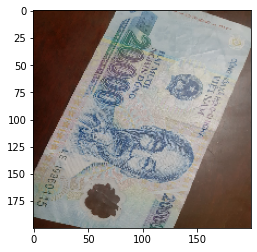

In [17]:
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
img = load_img('/content/20k.jpg',target_size = (200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_money.predict(img)
class_name=['1k','2k','5k','10k','20k','50k','100k','200k','500k']
h= int(np.argmax(result,axis=1))
print("Đây là :", class_name[h])

In [41]:
!jupyter nbconvert --to html "/content/Flower.ipynb"

[NbConvertApp] WARNING | pattern '/content/Flower.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute